# Import Data

In [85]:
###### import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression

# Gaussian Original
# df = pd.read_csv("C:/Users/kateh/OneDrive/Documents/GitHub/BP24/Ellee/Data/Gaussian/gaussian_orig.csv", header=None)

# Uniform Original
# df = pd.read_csv("C:/Users/kateh/OneDrive/Documents/GitHub/BP24/Ellee/Data/Uniform/uniform_orig.csv", header=None)

# Stacked Original
df = pd.read_csv("C:/Users/kateh/OneDrive/Documents/GitHub/BP24/Ellee/Data/Stacked/stacked_orig.csv", header=None)

df.info

# # Creating NumPy array
# array = np.array(data)

# # Converting to Pandas DataFrame
# df = pd.DataFrame(array)

<bound method DataFrame.info of            0         1         2         3         4         5         6   \
0   -0.523644 -0.273276 -0.116495  0.405252  1.197326  0.596777  0.538033   
1    1.910844  0.797754  3.256096  1.803028 -1.190719  0.792517  1.187202   
2    0.614962  1.306320 -0.156224  0.208113 -0.142056  0.331569 -0.139525   
3   -0.070894  0.848884  0.023903  0.232592  1.261394  0.678807  0.218641   
4    0.493572  0.730451  0.669870  0.671474  0.927129 -0.167649  0.735716   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.794388  0.274516  0.180763  0.435718  1.275335  0.705205  1.317206   
236  0.520387 -1.083603  0.621607  0.629536  0.751939 -0.883465  0.337003   
237  3.168389  1.261369  2.362146  1.498775  3.540290 -0.528903  0.764048   
238  3.957235  2.410099  0.698402 -1.049969  0.876141 -0.665939  0.346620   
239  1.903798  0.637188  0.683087  0.521806  0.537816  0.756112  0.143213   

           7         8         9   ...     

# Convert 25/150 Columns into NON-CONSECUTIVE Categorical Variables

In [86]:
# for i in range(-5,0):
#     df.iloc[:,i] = df.iloc[:,i].astype(int) # Integer
#     df.iloc[:,i] = df.iloc[:,i].astype('category') # Categories
# df.dtypes

# Train Test Split

In [87]:
# from sklearn.model_selection import train_test_split
# # Split dataset into X_train and y_train
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# Gaussian = 120 train
# Uniform = 240 train
# Stacked = 168 train

X_train = df.iloc[:168,:-1]
X_test = df.iloc[168:,:-1]
y_train = df.iloc[:168,-1]
y_test = df.iloc[168:,-1]

In [88]:
# Gaussian
# random_columns = [2,3,7,9]

# Uniform
# random_columns = [2,7,10,15]

# Stacked
random_columns = [16,17,18,19,20,21,22,23]

print("Randomly selected columns:", random_columns)

# Create a copy of the saved_X_train variable
cat_X_train = X_train.copy()

# Process the randomly selected columns into categorical
for col in random_columns:
    cat_X_train[col] = X_train[col].round().astype(int)
cat_X_train.dtypes

Randomly selected columns: [16, 17, 18, 19, 20, 21, 22, 23]


0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16      int32
17      int32
18      int32
19      int32
20      int32
21      int32
22      int32
23      int32
dtype: object

In [89]:
# drop_X_train = cat_X_train.drop(labels=random_columns, axis=1)
# drop_X_train.head()

In [90]:
# # Create a copy of the saved_X_test variable
# cat_X_test = X_test.copy()

# # Process the randomly selected columns
# for col in random_columns:
#     cat_X_test[col] = X_test[col].round().astype(int).astype("category")

# # Check if 4 columns were converted to categorical
# print(cat_X_test.dtypes)

# Visualization

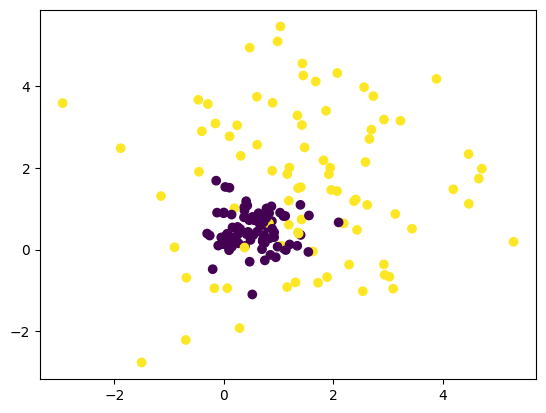

In [91]:
scatter = plt.scatter(X_train.iloc[:,6], X_train.iloc[:,7], c=y_train)

# SMOTE

In [92]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# df = pd.read_csv("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/IRIS.csv")
# df.head()

In [93]:
# # Data exploration
# x=df.drop(['species'],axis=1)[1:70] # 150 rows -> 70 rows to match with created imbalance
# y=df['species'][1:70] # creating imbalance
# count_class=df['species'][1:70].value_counts()
# bar_colors = ['tab:blue', 'tab:red']
# plt.bar(count_class.index, count_class.values, color=bar_colors)
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.title('Class Distribution')
# plt.xticks(count_class.index, ['Iris-setosa', 'Iris-versicolor'])
# plt.show()
# y.value_counts()

In [94]:
# # SMOTE to balance species classes
# smote=SMOTE(sampling_strategy='minority')  # generating synthetic samples for minority class
# x,y=smote.fit_resample(x,y) # re-sampling
# y.value_counts() # Looking at counts post-SMOTE algoirthm

# count_class=y.value_counts()
# bar_colors = ['tab:blue', 'tab:red']
# plt.bar(count_class.index, count_class.values, color=bar_colors)
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.title('Class Distribution')
# plt.xticks(count_class.index, ['Iris-setosa', 'Iris-versicolor'])
# plt.show()
# y.value_counts()

# Edited function

In [95]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 23 13:45:56 2024

@author: cdiet
"""

import pandas as pd
import numpy as np
import random
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.svm import SVC


def betterApplyAugmentationMethods(X_train, method, nrows, nvalues=None, unit=None, noise=None):
    # If nvalues not specified, entire column is selected
    if nvalues is None:
        nvalues = X_train.shape[1] - 1

    if str(method).lower() == 'pmone':
        # Creates empty dataframe to store augmented data
        augmentedDf = pd.DataFrame()

        # Randomly selects rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects nvalues amount of unique column indexes
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Iterates through augmentedData and applies plus or minus to randCols indexes
        for i in range(augmentedDf.shape[0]):
            for col in randCols:
                if (random.randint(0, 1) == 0):
                    augmentedDf.iloc[i, col] += unit
                else:
                    augmentedDf.iloc[i, col] -= unit

        return augmentedDf

    elif str(method).lower() == 'modpmone':
        # Creates empty dataframe to store augmented data
        augmentedDf = pd.DataFrame()

        # Randomly selects rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects nvalues amount of unique column indexes
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Iterates through augmentedData and applies plus or minus to randCols indexes
        for i in range(augmentedDf.shape[0]):
            for col in randCols:
                colMax = X_train.iloc[:, col].max()
                colMin = X_train.iloc[:, col].min()

                if (augmentedDf.iloc[i, col] + unit < colMax and augmentedDf.iloc[i, col] - unit > colMin):
                    if (random.randint(0, 1) == 0):
                        if (augmentedDf.iloc[i, col] + unit <= colMax):
                            augmentedDf.iloc[i, col] += unit
                        else:
                            augmentedDf.iloc[i, col] -= unit
                    else:
                        if (augmentedDf.iloc[i, col] - unit >= colMin):
                            augmentedDf.iloc[i, col] -= unit
                        else:
                            augmentedDf.iloc[i, col] += unit

        return augmentedDf

    elif str(method).lower() == 'gausnoise':
        # Creates empty dataframe to hold augmented rows
        augmentedDf = pd.DataFrame()

        # Selects random rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects random unique column index
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Applies Gaussian noise to randCols values stored in array
        for i in range(augmentedDf.shape[0]):
            for cols in randCols:
                augmentedDf.iloc[i, cols] += np.random.normal(0, noise)

        return augmentedDf

    elif str(method).lower() == 'modgausnoise':
        # Creates an empty dataframe to hold augmented observations
        augmentedDf = pd.DataFrame()

        # Randomly selects unique column indexs from data
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Appends randomly selected rows from data to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Generates Gaussian distribution based on columns summary statistics
        # Swaps value with random value in generated Gaussian distribution
        for col in randCols:
            for i in range(augmentedDf.shape[0]):
                mean = augmentedDf[col].mean()
                stDev = augmentedDf[col].std()

                augmentedDf.iloc[i, col] = np.random.normal(mean, stDev)

        return augmentedDf

    elif str(method).lower() == 'randswap':
        # Creates empty dataframe to store augmented rows
        augmentedDf = pd.DataFrame()

        # Copies nrows from original data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Picks UNIQUE column indexes to swap
        columnIndexSwaps = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Swaps augmentedDf column value from same column in data
        for i in range(augmentedDf.shape[0]):
            for col in columnIndexSwaps:
                randValue = X_train.iloc[random.randint(0, X_train.shape[0] - 1), col]

                augmentedDf.iloc[i, col] = randValue

        return augmentedDf

    else:
        print("Method not found")
        return None


def generateLabels(X_train, Y_train, augmented):
    # import the class
    from sklearn.linear_model import LogisticRegression

    # instantiate the model (using the default parameters)
    # random.seed(1)
    logreg = LogisticRegression(max_iter=10000)

    # fit the model with data

    # print(y_train)
    logreg.fit(X_train, Y_train)

    # create the prediction
    augmented_labels = pd.DataFrame(logreg.predict(augmented))

    Y_train = pd.concat([Y_train, augmented_labels], axis=0, ignore_index=True)

    X_train = pd.concat([X_train, augmented], axis=0, ignore_index=True)

    return X_train, Y_train


def runClassifier(X_train, Y_train, X_test, Y_test, classifier):
    # Creates accuracy table dataframe
    results_df = pd.DataFrame(columns=["Accuracy", "Mean Absolute Error", "Rooted Mean Square Error", "F1 Score"])

    if classifier == "kNN":

        knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

        knn.fit(X_train, Y_train.values.ravel())

        # Predict on dataset which model has not seen before
        predicted_values = knn.predict(X_test)

    elif classifier == "D_tree":
        clf_gini = DecisionTreeClassifier(criterion="gini",
                                          random_state=100, max_depth=3, min_samples_leaf=5)

        clf_gini.fit(X_train, Y_train)

        predicted_values = clf_gini.predict(X_test)


    elif classifier == "Naive_bayes":

        classifier = GaussianNB()
        classifier.fit(X_train, Y_train)

        predicted_values = classifier.predict(X_test)

    elif classifier == "ANN":
        # Performing Feature Scaling
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        # Initializing Artificial Neural Network
        ann = tf.keras.models.Sequential()

        # Adding Hidden Layers
        ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
        ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

        # Adding output layers
        ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

        # compiling the Artificial Neural Network
        ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

        # Fitting the Artificial Neural Network
        ann.fit(X_train, Y_train, batch_size=32, epochs=100)

        # Generate the predicted labels
        first_predicted_values = ann.predict(X_test)
        second_predicted_labels = first_predicted_values > .5
        final_predicted_labels = second_predicted_labels * 1
        predicted_values = final_predicted_labels

    # SVM
    elif classifier == "SVM":
        # random.seed(1)
        svm = SVC(gamma=2, C=1, kernel='linear', max_iter=1000000, random_state=0)

        # fit the model with data
        # svm.fit(X_train,y_train)
        svm.fit(X_train, Y_train)
        predicted_values = svm.predict(X_test)

        # SVM
    elif classifier == "xgboost":
        # Create model instance
        bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', enable_categorical=True)
        
        # fit model with the training data
        bst.fit(X_train, y_train)
        
        # make predictions for the test dataset
        predicted_values = bst.predict(X_test)

    else:
        print("Unknown classifier")
        return None

    # Accuracy
    acc = skm.accuracy_score(Y_test, predicted_values)
    mae_accuracy = skm.mean_absolute_error(Y_test, predicted_values)
    #rmse_accuracy = skm.root_mean_squared_error(Y_test, predicted_values)
    f1_accuracy = skm.f1_score(Y_test, predicted_values)

    # Appends accuracies to accuracy table
    results_df.loc[1, 'Accuracy'] = acc
    results_df.loc[1, 'Mean Absolute Error'] = mae_accuracy
    #results_df.loc[1, 'Rooted Mean Square Error'] = rmse_accuracy
    results_df.loc[1, 'F1 Score'] = f1_accuracy

    return results_df


"""
generatedGaussianDistrubutions Inputs

nrows: Number of rows
ncolumns: Number of columns
median1: First Gaussian distribution median (center)
median2: Second Gaussian distribution median (center)
spread1: First Gaussian distrbiution spread
spread2: Second Gaussian distribution spread

Note:
if label == 0, first Gaussian distribution
if label == 1, second Gaussian distribution
"""


def generateGaussianDistributions(nrows, ncolumns, median1, median2, spread1, spread2):
    # Creates first Gaussian distribution
    label1 = pd.DataFrame(np.random.normal(median1, spread1, size=(int(nrows / 2), ncolumns)))
    # Adds new column for label
    label1['label'] = 0

    # Creates second Gaussian distribution
    label2 = pd.DataFrame(np.random.normal(median2, spread2, size=(int(nrows / 2), ncolumns)))
    # Adds new column for label
    label2['label'] = 1

    # Combines both Gaussian distributions
    df = pd.concat([label1, label2])

    # Shuffles Gaussian distributions
    shuffled_df = pd.DataFrame(np.random.permutation(df))

    return shuffled_df


"""
superFunction applies all methods from the flowchart: augmentation, 
interpretable/uninterpretable classifiers, and accuracy, taking all inputs from
these functions and outputs the accuracy of the augmented data.

Inputs:
    data: A dataframe where the labels are the LAST column
    method: The augmentation method the user wants to use for the data
    nrows: How many output augmentation rows are wanted
    nvalues: The number of values in each row that need to be augmented
    classifier: The classifier the user wants to use
    unit(optional): Only for the pmOne augmentation method and is the unit the 
    augmented data will differ from original data by
    noise(optional): Only for the gausNoise augmentation method and denotes the
    percent by which the augmented data varies from original data


Outputs:
    Returns two dataframes of original and augmented data accuracy measures
"""


def superFunction(data, method, nrows, nvalues, classifier, unit=None, noise=None):
    X = data.drop(data.shape[1] - 1, axis=1)
    Y = data[data.shape[1] - 1]

    # Split into training and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42)

    original_accuracies = runClassifier(X_train, Y_train, X_test, Y_test, classifier)

    # Applies augmentation method to X_train
    augmented = betterApplyAugmentationMethods(X_train, method, nrows, nvalues, unit=unit, noise=noise)

    # Generates labels and concat to X_train and Y_train
    X_train, Y_train = generateLabels(X_train, Y_train, augmented)

    augmented_accuracies = runClassifier(X_train, Y_train, X_test, Y_test, classifier)

    return original_accuracies, augmented_accuracies


df = generateGaussianDistributions(500, 150, 0, 0.25, 1, 1)

# Prints the F1 Score of the augmented data for each augmentation method
# print('pmOne:', superFunction(df, "pmOne", 200, 15, "kNN", unit=0.1)[1]['F1 Score'][1])
# print('randSwap:', superFunction(df, "randSwap", 200, 15, "kNN")[1]['F1 Score'][1])
print('gausNoise:', superFunction(df, "gausNoise", 200, 15, "kNN", noise=0.1)[1]['F1 Score'][1])
# print('modPmOne:', superFunction(df, "modpmone", 200, 15, "kNN", unit=0.1)[1]['F1 Score'][1])
# print('modGausNoise:', superFunction(df, "modgausnoise", 200, 15, "kNN")[1]['F1 Score'][1])


orig, new = superFunction(df, "pmOne", 200, 15, "kNN", unit=0.1)
print('No Augmentation:', orig['F1 Score'][1])
print('w/ Augmentation:', new['F1 Score'][1])



gausNoise: 0.6194690265486725
No Augmentation: 0.6915887850467289
w/ Augmentation: 0.6601941747572816


In [96]:
def betterApplyAugmentationMethods(X_train, method, nrows, nvalues=None, unit=None, noise=None):
    # If nvalues not specified, entire column is selected
    if nvalues is None:
        nvalues = X_train.shape[1] - 1

    if str(method).lower() == 'randswap':
        # Creates empty dataframe to store augmented rows
        augmentedDf = pd.DataFrame()

        # Copies nrows from original data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Picks UNIQUE column indexes to swap
        rng = np.random.default_rng(42672244757883671377369755671764847711)
        columnIndexSwaps = rng.choice(range(0, X_train.shape[1] - 1), nvalues)

        # Swaps augmentedDf column value from same column in data
        for i in range(augmentedDf.shape[0]):
            for col in columnIndexSwaps:
                randValue = X_train.iloc[random.randint(0, X_train.shape[0] - 1), col]

                augmentedDf.iloc[i, col] = randValue

        return augmentedDf

    elif str(method).lower() == 'modpmone':
        # Creates empty dataframe to store augmented data
        augmentedDf = pd.DataFrame()

        # Randomly selects rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects nvalues amount of unique column indexes
        rng = np.random.default_rng(42672244757883671377369755671764847711)
        randCols = rng.choice(range(0, X_train.shape[1] - 1), nvalues)

        # Iterates through augmentedData and applies plus or minus to randCols indexes
        for i in range(augmentedDf.shape[0]):
            for col in randCols:
                colMax = X_train.iloc[:, col].max()
                colMin = X_train.iloc[:, col].min()

                if (augmentedDf.iloc[i, col] + unit < colMax and augmentedDf.iloc[i, col] - unit > colMin):
                    if (random.randint(0, 1) == 0):
                        if (augmentedDf.iloc[i, col] + unit <= colMax):
                            augmentedDf.iloc[i, col] += unit
                        else:
                            augmentedDf.iloc[i, col] -= unit
                    else:
                        if (augmentedDf.iloc[i, col] - unit >= colMin):
                            augmentedDf.iloc[i, col] -= unit
                        else:
                            augmentedDf.iloc[i, col] += unit

        return augmentedDf

    else:
        print("Method not found")
        return None

def generateLabels(X_train, Y_train, augmented):
    # instantiate the model (using the default parameters)
    # random.seed(1)
    logreg = LogisticRegression(max_iter=10000)
    
    # fit the model with data
    
    # print(y_train)
    logreg.fit(X_train, Y_train)
    
    # create the prediction
    augmented_labels = pd.DataFrame(logreg.predict(augmented))
    
    Y_train = pd.concat([Y_train, augmented_labels], axis=0, ignore_index=True)
    
    X_train = pd.concat([X_train, augmented], axis=0, ignore_index=True)
    
    return X_train, Y_train

In [97]:
##### CHANGE HERE #######
gaussian_aug = betterApplyAugmentationMethods(cat_X_train, 'modpmone', 240, nvalues=24, unit=1)
gaussian_aug
np.savetxt('stacked_modpmone.csv', gaussian_aug, delimiter=',')

In [83]:
# cat_X_train.head()

In [82]:
# cat_X_train.info()